In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [59]:
# With the use of pandas, we make a data frame of the entire csv file to handle better.
df = pd.read_csv('responses.csv')
df_copy = df.copy()

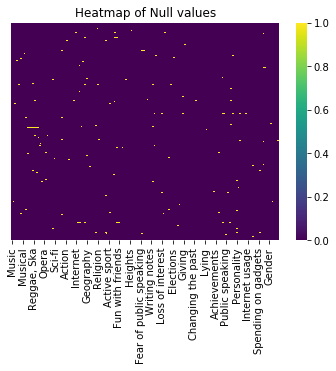

In [60]:
# To check the nan values in the entire dataset.
sns.heatmap(df.isnull(),yticklabels=False,cmap = 'viridis')
plt.title("Heatmap of Null values")
plt.show()

We see a lot small small null values

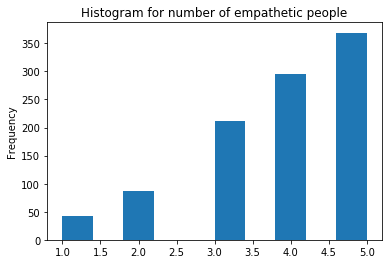

In [61]:
plt.title("Histogram for number of empathetic people")
df_copy['Empathy'].plot.hist(alpha=1)
plt.show()

There a lot of empathetic people when compared to people with no empathy.

In [99]:
#list(df_copy.columns)

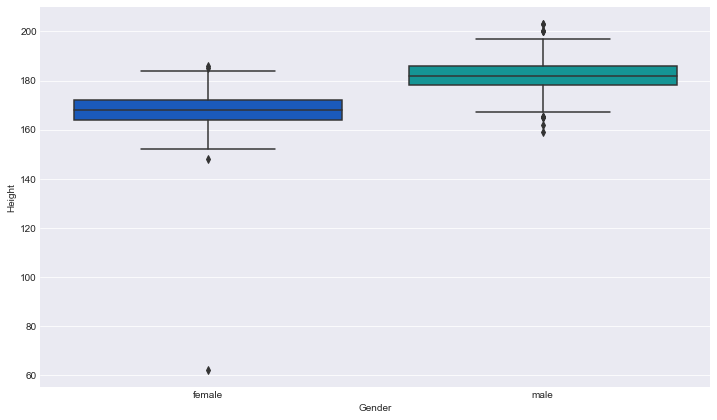

In [93]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Gender',y='Height',data=df,palette='winter')

We see the entire distribution of height with respect to age being centred at 160 for female and 180 for male

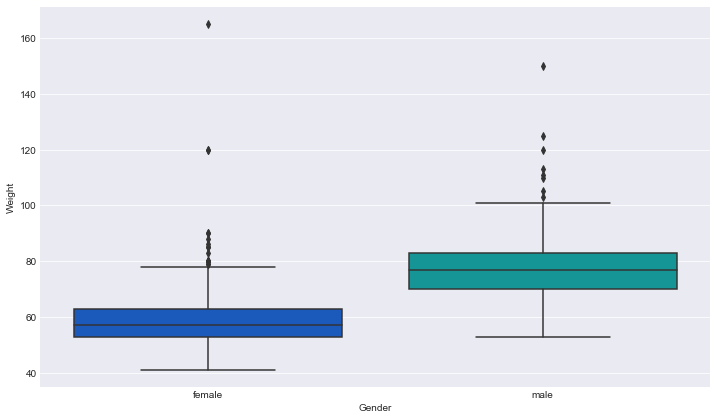

In [94]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Gender',y='Weight',data=df,palette='winter')

Weight for female around 55 and 75 for male are centred.

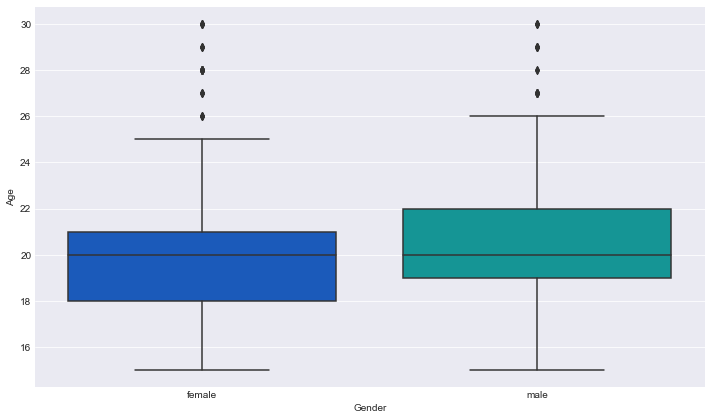

In [95]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Gender',y='Age',data=df,palette='winter')

We see the ages are around in btween 20-25 for both male and female.

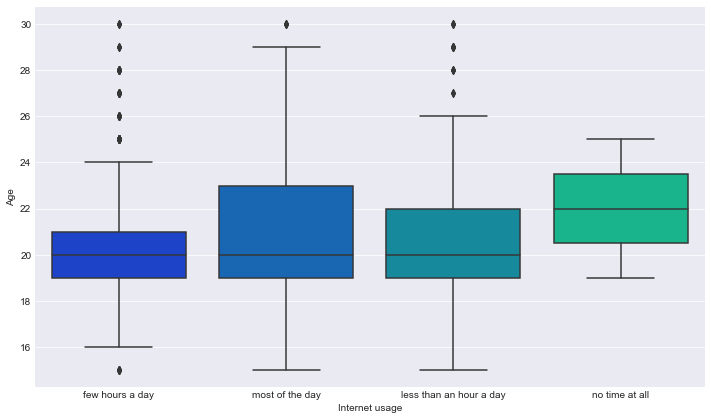

In [98]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Internet usage',y='Age',data=df,palette='winter')

We see that all the age groups are evenly distributed in internet usage.

The box plots were necessary to fill the NAN values as to get an idea on what to fill and not just drop the rows.

In [101]:
#df.isna().max()

In [65]:
print("Dropping Rows for NULL Values in Empathy Column")
df_copy.dropna(subset=['Empathy'], inplace = True)
df_copy.reset_index(inplace= True, drop = True)

Dropping Rows for NULL Values in Empathy Column


# Selecting only Numerical data

In [8]:
#df_copy = df_copy.select_dtypes(exclude=[object])

# Select on Tree based

In [9]:
tree_feature = ExtraTreesClassifier()

In [67]:
null_list = list(df_copy.columns[df_copy.isnull().any()])
for i in null_list:
    if df_copy[i].dtype != 'O':
        df_copy[i].fillna(value = round(df[i].mean()) % 5, inplace = True)

In [68]:
#sns.heatmap(df_copy.isnull(),yticklabels=False,cmap = 'viridis')
null_categical = list()
for i in list(df_copy.columns):
    if df_copy[i].dtype == 'O':
        null_categical.append(i)


In [69]:
def replace_categorical(value, mode):
    if pd.isnull(value):
        value = mode
    return value

for i in null_categical:
    df_copy[i] = df_copy[i].apply(lambda value: replace_categorical(value, list(df_copy[i].mode())[0]))

In [102]:
#list(df_copy.columns)

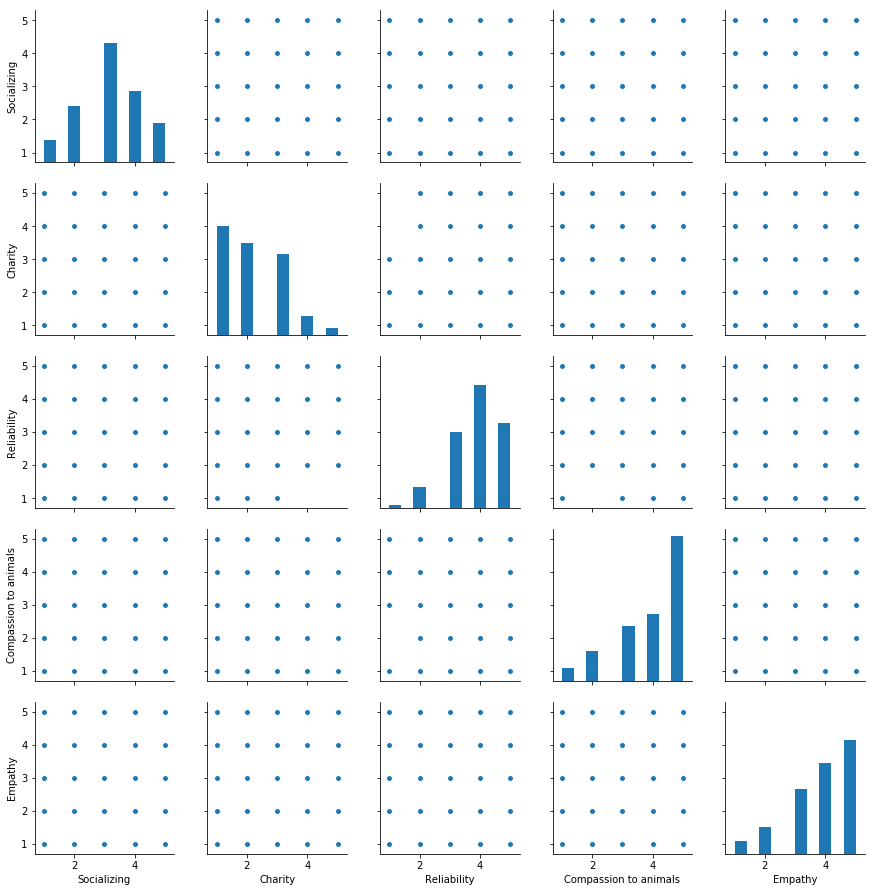

In [76]:
sns.pairplot(df_copy[['Socializing','Charity','Reliability','Compassion to animals','Empathy']])

This is a pair plot of empathy with respect to other columns to see a relation between all of them. Maybe to get a correlation between columns.

In [103]:
# 

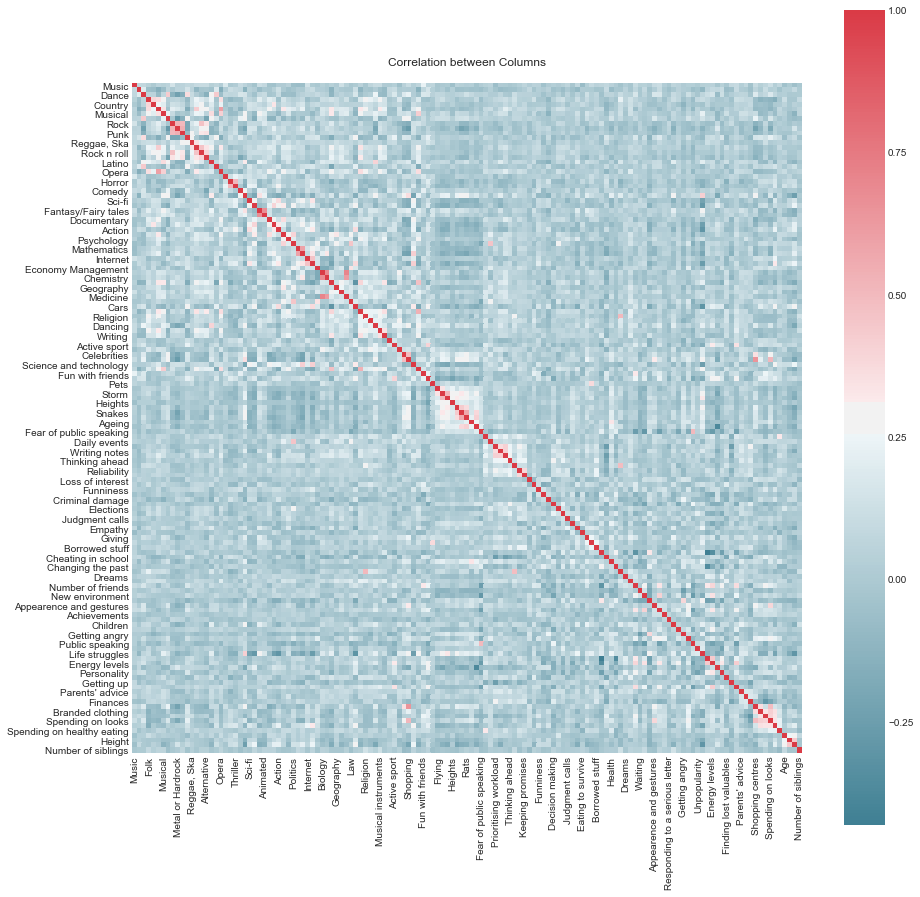

In [90]:
f, ax = plt.subplots(figsize=(15, 15))
corr = df_copy.corr()
plt.title('Correlation between Columns\n')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

The above plot shows a co-relation of features with one another. The highest co-relation is shown with a darker shade of pink which is obviously visible along the diagonal as well as some columns like spending on looks and shopping.

In [13]:
#sns.heatmap(df_copy.isnull(),yticklabels=False,cmap = 'viridis')

In [14]:
#len(list(df_copy.columns[df_copy.isnull().any()]))
label_encode_dict = dict()
##Encode the labels
def Label_encode(data,column_name):
    values = np.array(data)
    le = LabelEncoder() 
    result = le.fit_transform(values)
    return result
df_create = pd.DataFrame()

##Call the Above Function
for i in null_categical:
    result = Label_encode(df_copy[i],i)
    df_result = pd.DataFrame(result, columns= [i])
    df_create = pd.concat([df_create,df_result],axis =1 )
    
#Drop the categorical columns from initial table
for i in null_categical:
    df_copy.drop([i], inplace= True, axis =1)
    df_copy.reset_index(inplace= True, drop = True)

#Concat the created label encoded columns back to initial Dataframe
df_copy = pd.concat([df_copy,df_create], axis =1)

In [15]:
X =X_new = df_copy.drop(['Empathy'], axis = 1)
y = df_copy['Empathy']

Select K best method for feature Selection.

In [16]:
X_new = SelectKBest(chi2, k=15).fit_transform(X, y)

Select Features on Tree Based Selection.

In [17]:
extra_tree_select= RandomForestClassifier(n_estimators=100,max_depth=50, max_features= 100)
extra_tree_select.fit(X, y)
#print(extra_tree_select.feature_importances_)  
model = SelectFromModel(extra_tree_select, prefit=True)
X_new = model.transform(X)
print(X_new.shape)              

(1005, 53)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Decision Tree Classifier - Baseline Classifier

In [20]:
dtree = DecisionTreeClassifier(max_depth= 25)

In [21]:
dtree.fit(X_train,y_train)
#df_copy['Smoking'].isna().sum()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
pred = dtree.predict(X_dev)

In [23]:
np.mean(y_dev == pred)

0.4074074074074074

In [24]:
pred_test_dtree = dtree.predict(X_test)

In [25]:
np.mean(pred_test_dtree == y_test)

0.3383084577114428

# Random Forest Classifier

In [39]:
rd = RandomForestClassifier(n_estimators= 1000, max_depth= 10, max_features= 10)

In [40]:
rd.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
pred_rd = rd.predict(X_dev)
np.mean(y_dev == pred_rd)

0.5185185185185185

In [42]:
pred_random_test = rd.predict(X_test)
np.mean(pred_random_test == y_test)

0.472636815920398

In [44]:
print(classification_report(pred_random_test,y_test))

             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         0
        2.0       0.00      0.00      0.00         1
        3.0       0.23      0.68      0.34        19
        4.0       0.47      0.32      0.38        71
        5.0       0.83      0.54      0.65       110

avg / total       0.64      0.47      0.52       201



c:\users\y-500\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Linear SVC

In [31]:
linear_svc = SVC()
linear_svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
pred_svc = linear_svc.predict(X_dev)
np.mean(pred_svc == y_dev)

0.49382716049382713

In [51]:
pred_svc_test = linear_svc.predict(X_test)
np.mean(pred_svc_test == y_test)

0.38308457711442784

# AdaBoosting

In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
rd_Ada = RandomForestClassifier(n_estimators= 1000, max_depth= 5, max_features= 10)
adaboost = AdaBoostClassifier(base_estimator= rd_Ada)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [36]:
pred_ada_dev = adaboost.predict(X_dev)
np.mean(pred_ada_dev == y_dev)

0.48148148148148145

In [37]:
pred_ada_test = adaboost.predict(X_test)
np.mean(pred_ada_test == y_test)

0.46766169154228854

In [38]:
print(classification_report(pred_ada_test, y_test))

             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         0
        2.0       0.00      0.00      0.00         1
        3.0       0.28      0.64      0.39        25
        4.0       0.55      0.33      0.41        83
        5.0       0.72      0.55      0.63        92

avg / total       0.59      0.47      0.50       201



c:\users\y-500\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
